In [1]:
from PIL import Image
import os

In [2]:
# directory = os.path.dirname(os.path.abspath(__file__))
# image_file = os.path.join(directory,'test.jpg')

image_file = os.path.abspath('test.jpg')



'C:\\Users\\alexm\\Documents\\Random Python\\Steganography\\test.jpg'

In [3]:
to_code = Image.open(image_file)

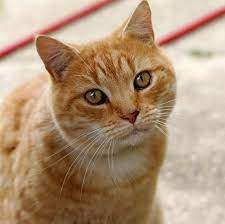

In [4]:
to_code


In [5]:
#convert image into a list of rgb values pixel by pixel and then converts that into a list of the valuues
image_pixels = list(to_code.getdata())
image_lists = [list(x) for x in image_pixels]
image_list = [pix for sublist in image_lists for pix in sublist]


In [6]:
# get image size
width = to_code.size[0]
height = to_code.size[1]
width, height

(225, 224)

In [7]:
string = 'Hello World'
string_len = len(string)

In [29]:
#convert the text into ascii values then converts those to binary.  Make each character 7 digits long after subtracting 1 
# from the ascii value 

bi_char = []
for char in string: 
    ascii_val = ord(char)
    print(ascii_val)
    binary_val = bin(ascii_val)[2:].zfill(7)
    bi_char.append(binary_val)

bi_char

72
101
108
108
111
32
87
111
114
108
100


['1001000',
 '1100101',
 '1101100',
 '1101100',
 '1101111',
 '0100000',
 '1010111',
 '1101111',
 '1110010',
 '1101100',
 '1100100']

In [11]:
# turn the length of the message into an seven digit binarry value
bi_len = bin(string_len)[2:].zfill(7)

In [20]:
string_len, bi_len

(11, '0001011')

In [12]:
#insert lenght of message as binary value to start of string
bi_char.insert(0, bi_len)
bi_char

['0001011',
 '1000111',
 '1100100',
 '1101011',
 '1101011',
 '1101110',
 '0011111',
 '1010110',
 '1101110',
 '1110001',
 '1101011',
 '1100011']

In [13]:
message_len = len(bi_char)*7


In [14]:
bi_char_joined = ''.join(bi_char)
bi_char_joined

'000101110001111100100110101111010111101110001111110101101101110111000111010111100011'

In [25]:
# setting so pixel values are even if equiv character in message is '0' and odd if '1'

encoded_image_list = []
for i in range(message_len):
    if int(bi_char_joined[i]) != image_list[i]%2:
        encoded_image_list.append(image_list[i]-1)
        print('unmatched')
        print(bi_char_joined[i])
        print(image_list[i])
        print(encoded_image_list)
#         print(int(bi_char_joined[i]))
#         print(image_list[i]-1)
    else:
        encoded_image_list.append(image_list[i])
        print('matched')
        print(bi_char_joined[i])
        print(image_list[i])
        print(encoded_image_list)

        
encoded_image_list += image_list[message_len:]

matched
0
216
[216]
unmatched
0
211
[216, 210]
unmatched
0
179
[216, 210, 178]
unmatched
1
218
[216, 210, 178, 217]
unmatched
0
213
[216, 210, 178, 217, 212]
matched
1
181
[216, 210, 178, 217, 212, 181]
matched
1
221
[216, 210, 178, 217, 212, 181, 221]
unmatched
1
216
[216, 210, 178, 217, 212, 181, 221, 215]
matched
0
186
[216, 210, 178, 217, 212, 181, 221, 215, 186]
matched
0
226
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226]
matched
0
220
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226, 220]
unmatched
1
194
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226, 220, 193]
unmatched
1
232
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226, 220, 193, 231]
unmatched
1
226
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226, 220, 193, 231, 225]
unmatched
1
202
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226, 220, 193, 231, 225, 201]
unmatched
1
236
[216, 210, 178, 217, 212, 181, 221, 215, 186, 226, 220, 193, 231, 225, 201, 235]
unmatched
0
229
[216, 210, 178, 217, 212, 181, 221, 215, 186

In [16]:
# rebuilding the image
image_bytes = bytes(encoded_image_list)

In [17]:
encoded_im = Image.frombytes('RGB', (width, height), image_bytes)

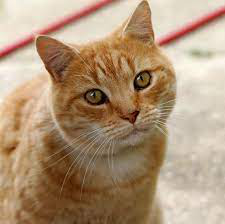

In [18]:
encoded_im

In [27]:
encoded_im.save('encoded_test.png')